# Data Exploration and Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the data from a csv into a pandas dataframe:

In [2]:
train_set = pd.read_csv('data/train.csv')
train_set.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


From the [Kaggle competition page](https://www.kaggle.com/c/titanic/data):

**Variable Notes**

pclass: A proxy for socio-economic status (SES)

    1st = Upper

    2nd = Middle

    3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...

    Sibling = brother, sister, stepbrother, stepsister

    Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...

    Parent = mother, father

    Child = daughter, son, stepdaughter, stepson

    Some children travelled only with a nanny, therefore parch=0 for them.

In [3]:
X_train = train_set.drop('Survived', axis=1) # Separate the labels from the training instances (creates a copy of train_set).
X_train.set_index(['PassengerId'],inplace=True)
X_train.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [4]:
y_train = train_set[['PassengerId','Survived']].copy() # Create a dataframe for the labels
y_train.set_index(['PassengerId'],inplace=True)
y_train.head(10)

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,1


In [5]:
X_train.info() # Get an idea of the null values and size of the training set.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


X_train has null or missing values for its Age, Cabin and Embarked columns. These will either have to be discarded or filled in order to train a model on it. Initial thoughts are that the median could be used to impute the Age column and the mode used to impute the Embarked column. Cabin indicates a cabin number and doesn't seem overly useful - however, there could be some correlation between cabin number and survival, with certain cabins being located closer to lifeboats? This could be inferred from the passenger's socio-economic class. However there's not much data available (75% missing) for the cabin number, making it difficult to use a mode that's actually representative.

In [6]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
dtypes: int64(1)
memory usage: 13.9 KB


The training labels obviously has no missing values.

Let's look at the age distribution:

In [7]:
X_train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

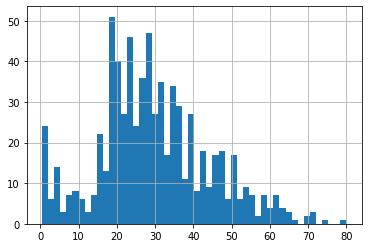

In [8]:
X_train['Age'].hist(bins=50)

The age distribution has a slight right skew.

Taking the log of the ages may help transform the distribution to be symmetrical:

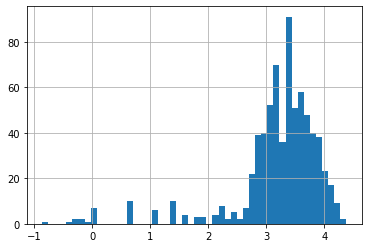

In [9]:
np.log(X_train['Age']).hist(bins=50)

Taking the log of the ages created a significant left skew. This is not a useful transformation for the dataset.

What about the gender distribution?

In [10]:
X_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

The gender distribution is skewed towards males.

# Data Preparation

Initial approach will drop the Name, Ticket, Fare and Cabin columns. The dtypes of the remaining columns need to be checked to ensure all numerical columns are floats or ints. The Sex column will need to be transformed using OneHotEncoding - say, into 1 column called is_female with 0 for no and 1 for yes. The Pclass and Embarked column will also need to be transformed using OneHotEncoding. 2 imputer transformers will be required - one to fill in the Age column with the median (we will check which average is the best to use using a GridSearch later) and one to fill in the Embarked column with the mode.

These features (as well as setting the index to the PassengerId column which was done above) need to be included in a Pipeline.

## Dropping irrelevant columns:

Irrelevant columns can be dropped using a ColumnTransformer by passing the string 'drop' instead of an estimator object. This is shown further down the script.

## Imputing missing values

From the data exploration section we know there are missing values in both the Age and Embarked columns. These can be imputed (filled in) using a SimpleImputer transformer (with different strategies for each column). The Embarked column then needs to be processed by a OneHotEncoder.

First let's look at the Age column:

In [11]:
from sklearn.impute import SimpleImputer

In [12]:
age_imputer = SimpleImputer(strategy='median')

In [13]:
age_imputer.fit(X_train[['Age']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [14]:
age_imputer.statistics_

array([28.])

In [15]:
age_imputer.transform(X_train[['Age']])

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

For the Embarked column, we need to first impute the missing values and later encode them.

In [16]:
embarked_imputer = SimpleImputer(strategy='most_frequent')

In [17]:
embarked_imputer.fit_transform(X_train[['Embarked']])

array([['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['Q'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['Q'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['Q'],
       ['S'],
       ['Q'],
       ['Q'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['C'],
       ['C'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
       ['S'],
      

In [18]:
embarked_imputer.statistics_

array(['S'], dtype=object)

## Encoding categorical variables:

In [19]:
from sklearn.preprocessing import OneHotEncoder
cat_sex_encoder = OneHotEncoder(drop='first')

In [20]:
X_train_sex_cat = cat_sex_encoder.fit_transform(X_train[['Sex']])

In [21]:
X_train_sex_cat = X_train_sex_cat.toarray()
X_train_sex_cat

array([[1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

Let's look at encoding the Pclass category:

In [22]:
cat_pclass_encoder = OneHotEncoder()
X_train_pclass_cat = cat_pclass_encoder.fit_transform(X_train[['Pclass']]).toarray()
X_train_pclass_cat

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [23]:
cat_pclass_encoder.categories_

[array([1, 2, 3], dtype=int64)]

The Embarked column can not be encoded until the missing values are imputed, therefore it can't be demonstrated here. However it is later implemented in the pipeline.

In [24]:
cat_embarked_encoder  = OneHotEncoder()
# cat_embarked_encoder.fit_transform(X_train[['Embarked']]).toarray()

In [25]:
# test_encoder = OneHotEncoder()
# test_encoder.fit_transform(X_train[['Pclass','Embarked']]).toarray()

## Scaling numerical values

Finally, we're going to standardize the Age column, that is scaling by subtracting the mean and dividing by the standard deviation.

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
scaler = StandardScaler()
scaler.fit_transform(X_train[['Age']])

array([[-0.53037664],
       [ 0.57183099],
       [-0.25482473],
       [ 0.36516706],
       [ 0.36516706],
       [        nan],
       [ 1.67403863],
       [-1.90813618],
       [-0.18593675],
       [-1.08148046],
       [-1.77036023],
       [ 1.94959054],
       [-0.6681526 ],
       [ 0.64071897],
       [-1.08148046],
       [ 1.74292661],
       [-1.90813618],
       [        nan],
       [ 0.08961515],
       [        nan],
       [ 0.36516706],
       [ 0.29627909],
       [-1.01259248],
       [-0.11704878],
       [-1.49480832],
       [ 0.57183099],
       [        nan],
       [-0.73704057],
       [        nan],
       [        nan],
       [ 0.70960695],
       [        nan],
       [        nan],
       [ 2.50069435],
       [-0.11704878],
       [ 0.8473829 ],
       [        nan],
       [-0.59926462],
       [-0.80592855],
       [-1.08148046],
       [ 0.70960695],
       [-0.18593675],
       [        nan],
       [-1.83924821],
       [-0.73704057],
       [  

## Creating a Pipeline for Numerical and Categorical Features

A column transformer is a transformer that can handle the entire training set, applying transformers to specific columns. Note that above I only demonstrated the Imputers and Scalers for specific columns, however in the pipeline all the numerical columns will have the same transformations, and the same applies for the categorical columns (note that there is a separate transformer for the Sex column in order to drop one of the encoded columns - the 'if_binary' parameter is not yet available on this version of scikit-learn).

In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [29]:
num_pipeline = Pipeline([
    ('num_imputer',SimpleImputer(strategy='median')),
    ('num_scaler',StandardScaler())
])

In [30]:
cat_pipeline = Pipeline([
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('cat_encoder',OneHotEncoder())
])

sex_pipeline = Pipeline([
    ('sex_imputer',SimpleImputer(strategy='most_frequent')),
    ('sex_encoder',OneHotEncoder(drop='first'))
])

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 76.6+ KB


In [32]:
data_processor = ColumnTransformer([
    ('drop_cols','drop',['Name','Ticket','Fare','Cabin']),
    ('num_processor',num_pipeline,['Age','SibSp','Parch']),
    ('cat_processor',cat_pipeline,['Pclass','Embarked']),
    ('sex_processor',sex_pipeline,['Sex'])
])

In [33]:
data_processor.fit(X_train)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('drop_cols', 'drop',
                                 ['Name', 'Ticket', 'Fare', 'Cabin']),
                                ('num_processor',
                                 Pipeline(memory=None,
                                          steps=[('num_imputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='median',
                                                                verbose=0)),
                                                 ('num_scaler',
                                         

In [34]:
X_train_prepared = data_processor.transform(X_train)

In [35]:
X_train_prepared.shape

(891, 10)

In [36]:
X_train_prepared

array([[-0.56573646,  0.43279337, -0.47367361, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.66386103,  0.43279337, -0.47367361, ...,  0.        ,
         0.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.1046374 ,  0.43279337,  2.00893337, ...,  0.        ,
         1.        ,  0.        ],
       [-0.25833709, -0.4745452 , -0.47367361, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.20276197, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  1.        ]])

This column transformer object can now be used to transform the test set automatically using its .transform() method. This transformer may need to be revised, possibly to include the Fare column - but we will see about this later.

# Initial Model Testing

Initially, we'll try an SGDClassifier, a KNN classifier, a RandomForestClassifier, an SVM classifier and logistic regression. We will write a function to print the accuracy, precision, recall and F1 score for each model. First, we must check if the labels are skewed.

In [37]:
total_survived = y_train.sum()
total_survived

Survived    342
dtype: int64

In [38]:
percent_survived = total_survived / len(y_train)
percent_survived

Survived    0.383838
dtype: float64

In [39]:
1 - percent_survived

Survived    0.616162
dtype: float64

Only 38.38% of people survived. This means if we guess for every passenger that they died, then we'll still have an accuracy of 61.62%. Therefore our accuracy scores must be significantly better than this benchmark.

Let's write a function to print the accuracy, precision, recall and F1 score for each model:

In [40]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [41]:
def print_scores(predictions,labels=y_train):
    print('Model accuracy:',accuracy_score(y_train,predictions))
    print('Model precision:',precision_score(y_train,predictions))
    print('Model recall:',recall_score(y_train,predictions))
    print('Model F1 score:',f1_score(y_train,predictions))
    
    return None

## SGDClassifier

First we'll try an SGDClassifier, which uses a linear SVM classifier by default. We will use cross_val predict to generate a set of predictions for each value in the training set - each prediction will be made with a 'clean' model, 'clean' meaning one that hasn't seen that particular instance when training yet as a result of the cross validation folds.

In [42]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

In [43]:
y_train_prepared = y_train.values.ravel()

sgd_clf = SGDClassifier()

sgd_pred = cross_val_predict(sgd_clf, X_train_prepared,y_train_prepared, cv=5)

In [44]:
print_scores(sgd_pred,y_train_prepared)

Model accuracy: 0.7463524130190797
Model precision: 0.6629213483146067
Model recall: 0.6900584795321637
Model F1 score: 0.6762177650429799


So the accuracy is 75.65%, which is a bit better than if we only predicted 0s (didn't survive). What about a KNN classifier?

## KNNClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
knn_clf = KNeighborsClassifier()

In [47]:
knn_pred = cross_val_predict(knn_clf, X_train_prepared,y_train_prepared, cv=5)

In [48]:
print_scores(knn_pred,y_train_prepared)

Model accuracy: 0.792368125701459
Model precision: 0.7540453074433657
Model recall: 0.6812865497076024
Model F1 score: 0.7158218125960062


## RandomForestClassifier

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
forest_clf = RandomForestClassifier()

In [51]:
forest_pred = cross_val_predict(forest_clf, X_train_prepared,y_train_prepared, cv=5)

In [52]:
print_scores(forest_pred,y_train_prepared)

Model accuracy: 0.7968574635241302
Model precision: 0.746177370030581
Model recall: 0.7134502923976608
Model F1 score: 0.7294469357249626


## SVM Classifier (rbf kernel)

In [53]:
from sklearn.svm import SVC

In [54]:
svm_clf = SVC(kernel='rbf')

In [55]:
svm_pred = cross_val_predict(svm_clf, X_train_prepared,y_train_prepared, cv=5)

In [56]:
print_scores(svm_pred,y_train_prepared)

Model accuracy: 0.8282828282828283
Model precision: 0.8181818181818182
Model recall: 0.7105263157894737
Model F1 score: 0.7605633802816901


## LogisticRegression

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
logreg_clf = LogisticRegression()

In [59]:
logreg_pred = cross_val_predict(logreg_clf, X_train_prepared,y_train_prepared, cv=5)

In [60]:
print_scores(logreg_pred,y_train_prepared)

Model accuracy: 0.7946127946127947
Model precision: 0.7492163009404389
Model recall: 0.6988304093567251
Model F1 score: 0.7231467473524964


The SVM classifier performs best out of the 5 models selected. The parameters for this model can be refined using GridSearchCV. From these 5 models, 2 show the most promising results: the random forest classifier and the SVM classifier. These will be refined using gridsearch in the next 2 sections.

# RandomForest Analysis

First, let's check the most important features in the model:

In [61]:
forest_clf.fit(X_train_prepared,y_train_prepared)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [62]:
forest_clf.feature_importances_

array([0.38480759, 0.06750222, 0.05536739, 0.04206312, 0.02042814,
       0.07545778, 0.01365903, 0.00980339, 0.01841861, 0.31249274])

In [63]:
for i,j in zip(['Age','SibSp','Parch','1','2','3','C','Q','S','female'],forest_clf.feature_importances_):
    print(i,j)

Age 0.38480759099315015
SibSp 0.06750221614714737
Parch 0.055367387342107804
1 0.04206312046583174
2 0.020428138709290267
3 0.07545777511170565
C 0.01365903048138475
Q 0.009803391544073798
S 0.018418608314155895
female 0.3124927408911526


The Embarked attribute isn't really important which isn't too surprising.

## GridSearchCV

We can do a grid search on the random forest classifier to better refine some of its parameters:

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[10,25,50,75,100],'max_features':[8,10],'class_weight':['balanced',None]},
    {'bootstrap':[False],'n_estimators':[10,25,50,75,100],'max_features':[8,10],'class_weight':['balanced',None]}
]

In [65]:
forest_clf = RandomForestClassifier()

In [66]:
grid_search = GridSearchCV(forest_clf, param_grid, cv=5, scoring='accuracy',
                           verbose=3, return_train_score=False)

In [67]:
grid_search.fit(X_train_prepared,y_train_prepared)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] class_weight=balanced, max_features=8, n_estimators=10 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=10, score=0.760, total=   0.0s
[CV] class_weight=balanced, max_features=8, n_estimators=10 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=10, score=0.798, total=   0.0s
[CV] class_weight=balanced, max_features=8, n_estimators=10 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=10, score=0.803, total=   0.0s
[CV] class_weight=balanced, max_features=8, n_estimators=10 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=10, score=0.820, total=   0.0s
[CV] class_weight=balanced, max_features=8, n_estimators=10 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=10, score=0.798, total=   0.0s
[CV] class_weight=balanced, max_features=8, n_estimators=25 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=25, score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  class_weight=balanced, max_features=8, n_estimators=25, score=0.826, total=   0.0s
[CV] class_weight=balanced, max_features=8, n_estimators=25 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=25, score=0.826, total=   0.0s
[CV] class_weight=balanced, max_features=8, n_estimators=25 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=25, score=0.781, total=   0.0s
[CV] class_weight=balanced, max_features=8, n_estimators=25 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=25, score=0.809, total=   0.0s
[CV] class_weight=balanced, max_features=8, n_estimators=50 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=50, score=0.765, total=   0.1s
[CV] class_weight=balanced, max_features=8, n_estimators=50 ..........
[CV]  class_weight=balanced, max_features=8, n_estimators=50, score=0.787, total=   0.1s
[CV] class_weight=balanced, max_features=8, n_estimators=50 ..........
[CV]  class_weight=balanced, max_feature

[CV]  class_weight=None, max_features=8, n_estimators=25, score=0.815, total=   0.0s
[CV] class_weight=None, max_features=8, n_estimators=25 ..............
[CV]  class_weight=None, max_features=8, n_estimators=25, score=0.837, total=   0.0s
[CV] class_weight=None, max_features=8, n_estimators=50 ..............
[CV]  class_weight=None, max_features=8, n_estimators=50, score=0.782, total=   0.1s
[CV] class_weight=None, max_features=8, n_estimators=50 ..............
[CV]  class_weight=None, max_features=8, n_estimators=50, score=0.809, total=   0.1s
[CV] class_weight=None, max_features=8, n_estimators=50 ..............
[CV]  class_weight=None, max_features=8, n_estimators=50, score=0.831, total=   0.1s
[CV] class_weight=None, max_features=8, n_estimators=50 ..............
[CV]  class_weight=None, max_features=8, n_estimators=50, score=0.809, total=   0.1s
[CV] class_weight=None, max_features=8, n_estimators=50 ..............
[CV]  class_weight=None, max_features=8, n_estimators=50, score=

[CV]  bootstrap=False, class_weight=balanced, max_features=8, n_estimators=50, score=0.754, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=8, n_estimators=50 
[CV]  bootstrap=False, class_weight=balanced, max_features=8, n_estimators=50, score=0.770, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=8, n_estimators=50 
[CV]  bootstrap=False, class_weight=balanced, max_features=8, n_estimators=50, score=0.803, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=8, n_estimators=50 
[CV]  bootstrap=False, class_weight=balanced, max_features=8, n_estimators=50, score=0.803, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=8, n_estimators=50 
[CV]  bootstrap=False, class_weight=balanced, max_features=8, n_estimators=50, score=0.815, total=   0.1s
[CV] bootstrap=False, class_weight=balanced, max_features=8, n_estimators=75 
[CV]  bootstrap=False, class_weight=balanced, max_features=8, n_estimators=75, s

[CV]  bootstrap=False, class_weight=None, max_features=8, n_estimators=25, score=0.815, total=   0.0s
[CV] bootstrap=False, class_weight=None, max_features=8, n_estimators=25 
[CV]  bootstrap=False, class_weight=None, max_features=8, n_estimators=25, score=0.798, total=   0.0s
[CV] bootstrap=False, class_weight=None, max_features=8, n_estimators=25 
[CV]  bootstrap=False, class_weight=None, max_features=8, n_estimators=25, score=0.826, total=   0.0s
[CV] bootstrap=False, class_weight=None, max_features=8, n_estimators=50 
[CV]  bootstrap=False, class_weight=None, max_features=8, n_estimators=50, score=0.743, total=   0.1s
[CV] bootstrap=False, class_weight=None, max_features=8, n_estimators=50 
[CV]  bootstrap=False, class_weight=None, max_features=8, n_estimators=50, score=0.803, total=   0.1s
[CV] bootstrap=False, class_weight=None, max_features=8, n_estimators=50 
[CV]  bootstrap=False, class_weight=None, max_features=8, n_estimators=50, score=0.815, total=   0.1s
[CV] bootstrap=Fal

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   20.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
                                              random_state=None, verbose=0,
                                   

In [68]:
grid_search.best_params_

{'class_weight': None, 'max_features': 10, 'n_estimators': 75}

In [69]:
forest_clf_refined = grid_search.best_estimator_

In [70]:
forest_pred_refined = cross_val_predict(forest_clf_refined, X_train_prepared,y_train_prepared, cv=5)

In [71]:
print_scores(forest_pred_refined,y_train_prepared)

Model accuracy: 0.8069584736251403
Model precision: 0.7639751552795031
Model recall: 0.7192982456140351
Model F1 score: 0.7409638554216867


# SVM Analysis

## GridSearchCV

Let's do a grid search on the SVM using the rbf kernel:

In [72]:
param_grid = [
    {'kernel':['rbf'],'C':[1.,5.,10.,50.,100.,500.,1000.], 'gamma':[.01,0.05,0.1,0.5,1,5,10]}
]

In [73]:
svm_clf = SVC()

grid_search_svm = GridSearchCV(svm_clf, param_grid, cv=5, scoring='accuracy',
                              verbose=3, return_train_score=False)

In [74]:
grid_search_svm.fit(X_train_prepared,y_train_prepared)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=1.0, gamma=0.01, kernel=rbf, score=0.810, total=   0.0s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=1.0, gamma=0.01, kernel=rbf, score=0.809, total=   0.0s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=1.0, gamma=0.01, kernel=rbf, score=0.787, total=   0.0s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=1.0, gamma=0.01, kernel=rbf, score=0.758, total=   0.0s
[CV] C=1.0, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=1.0, gamma=0.01, kernel=rbf, score=0.803, total=   0.0s
[CV] C=1.0, gamma=0.05, kernel=rbf ...................................
[CV] ....... C=1.0, gamma=0.05, kernel=rbf, score=0.838, total=   0.0s
[CV] C=1.0, gamma=0.05, kernel=rbf ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ........ C=1.0, gamma=0.5, kernel=rbf, score=0.820, total=   0.0s
[CV] C=1.0, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=0.5, kernel=rbf, score=0.809, total=   0.0s
[CV] C=1.0, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=0.5, kernel=rbf, score=0.792, total=   0.0s
[CV] C=1.0, gamma=0.5, kernel=rbf ....................................
[CV] ........ C=1.0, gamma=0.5, kernel=rbf, score=0.865, total=   0.0s
[CV] C=1.0, gamma=1, kernel=rbf ......................................
[CV] .......... C=1.0, gamma=1, kernel=rbf, score=0.782, total=   0.0s
[CV] C=1.0, gamma=1, kernel=rbf ......................................
[CV] .......... C=1.0, gamma=1, kernel=rbf, score=0.815, total=   0.0s
[CV] C=1.0, gamma=1, kernel=rbf ......................................
[CV] .......... C=1.0, gamma=1, kernel=rbf, score=0.820, total=   0.0s
[CV] C=1.0, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ...... C=10.0, gamma=0.05, kernel=rbf, score=0.854, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.804, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.815, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.815, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.787, total=   0.0s
[CV] C=10.0, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=10.0, gamma=0.1, kernel=rbf, score=0.876, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................
[CV] ....... C=10.0, gamma=0.5, kernel=rbf, score=0.771, total=   0.0s
[CV] C=10.0, gamma=0.5, kernel=rbf ...................................
[CV] .

[CV] ........ C=50.0, gamma=10, kernel=rbf, score=0.719, total=   0.0s
[CV] C=100.0, gamma=0.01, kernel=rbf .................................
[CV] ..... C=100.0, gamma=0.01, kernel=rbf, score=0.821, total=   0.0s
[CV] C=100.0, gamma=0.01, kernel=rbf .................................
[CV] ..... C=100.0, gamma=0.01, kernel=rbf, score=0.820, total=   0.0s
[CV] C=100.0, gamma=0.01, kernel=rbf .................................
[CV] ..... C=100.0, gamma=0.01, kernel=rbf, score=0.815, total=   0.0s
[CV] C=100.0, gamma=0.01, kernel=rbf .................................
[CV] ..... C=100.0, gamma=0.01, kernel=rbf, score=0.798, total=   0.0s
[CV] C=100.0, gamma=0.01, kernel=rbf .................................
[CV] ..... C=100.0, gamma=0.01, kernel=rbf, score=0.837, total=   0.0s
[CV] C=100.0, gamma=0.05, kernel=rbf .................................
[CV] ..... C=100.0, gamma=0.05, kernel=rbf, score=0.804, total=   0.0s
[CV] C=100.0, gamma=0.05, kernel=rbf .................................
[CV] .

[CV] ........ C=500.0, gamma=1, kernel=rbf, score=0.753, total=   0.3s
[CV] C=500.0, gamma=1, kernel=rbf ....................................
[CV] ........ C=500.0, gamma=1, kernel=rbf, score=0.764, total=   0.1s
[CV] C=500.0, gamma=5, kernel=rbf ....................................
[CV] ........ C=500.0, gamma=5, kernel=rbf, score=0.687, total=   0.1s
[CV] C=500.0, gamma=5, kernel=rbf ....................................
[CV] ........ C=500.0, gamma=5, kernel=rbf, score=0.753, total=   0.1s
[CV] C=500.0, gamma=5, kernel=rbf ....................................
[CV] ........ C=500.0, gamma=5, kernel=rbf, score=0.792, total=   0.2s
[CV] C=500.0, gamma=5, kernel=rbf ....................................
[CV] ........ C=500.0, gamma=5, kernel=rbf, score=0.770, total=   0.2s
[CV] C=500.0, gamma=5, kernel=rbf ....................................
[CV] ........ C=500.0, gamma=5, kernel=rbf, score=0.742, total=   0.5s
[CV] C=500.0, gamma=10, kernel=rbf ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:   19.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0],
                          'gamma': [0.01, 0.05, 0.1, 0.5, 1, 5, 10],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=3)

In [75]:
grid_search_svm.best_params_

{'C': 5.0, 'gamma': 0.05, 'kernel': 'rbf'}

In [76]:
svm_clf_tuned = grid_search_svm.best_estimator_

In [77]:
svm_tuned_preds = cross_val_predict(svm_clf_tuned, X_train_prepared,y_train_prepared,cv=5)

In [78]:
print_scores(svm_tuned_preds,y_train_prepared)

Model accuracy: 0.8282828282828283
Model precision: 0.813953488372093
Model recall: 0.716374269005848
Model F1 score: 0.7620528771384137


After tuning the hyperparameters of both models, the SVM classifier comes out as the winner and final model. While their accuracy scores are similar, the precision of the SVM clf is higher, with both models having similar recalls.

# Data Preparation Options

Data preparation options can automatically be explored using GridSearchCV. This can be done by making a single pipeline with both the data preparation transformer and the final model.

In [79]:
prepare_and_predict_pipeline = Pipeline([
    ('prepare_data',data_processor),
    ('model',SVC(**grid_search_svm.best_params_))
])

In [80]:
param_grid_data_prep = [
    {'prepare_data__num_processor__num_imputer__strategy':['mean','median','most_frequent'],
     'prepare_data__cat_processor__cat_imputer__strategy':['most_frequent','constant'],
     'prepare_data__cat_processor__cat_imputer__fill_value':['missing',None]}
]

In [81]:
data_prep_gridsearch = GridSearchCV(prepare_and_predict_pipeline, param_grid_data_prep, cv=5,
                                  verbose=3,scoring='accuracy')

In [82]:
data_prep_gridsearch.fit(X_train,np.array(y_train).ravel())

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_frequent, prepare_data__num_processor__num_imputer__strategy=mean 
[CV]  prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_frequent, prepare_data__num_processor__num_imputer__strategy=mean, score=0.838, total=   0.0s
[CV] prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_frequent, prepare_data__num_processor__num_imputer__strategy=mean 
[CV]  prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_frequent, prepare_data__num_processor__num_imputer__strategy=mean, score=0.831, total=   0.0s
[CV] prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_frequent, prepare_data__num_processor__num_imputer__strategy=mean 
[CV]  prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_frequent, prepare_data__num_processor__num_imputer__strategy=mean, score=0.848, total=   0.0s
[CV] prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_frequent, prepare_data__num_processor__num_imputer__strategy=median 
[CV]  prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_frequent, prepare_data__num_processor__num_imputer__strategy=median, score=0.838, total=   0.0s
[CV] prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=most_frequent, prepare_data__num_processor__num_imputer__stra

[CV]  prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__strategy=median, score=0.848, total=   0.0s
[CV] prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__strategy=most_frequent 
[CV]  prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__strategy=most_frequent, score=0.838, total=   0.0s
[CV] prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__strategy=most_frequent 
[CV]  prepare_data__cat_processor__cat_imputer__fill_value=missing, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__stra

[CV]  prepare_data__cat_processor__cat_imputer__fill_value=None, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__strategy=mean, score=0.815, total=   0.0s
[CV] prepare_data__cat_processor__cat_imputer__fill_value=None, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__strategy=mean 
[CV]  prepare_data__cat_processor__cat_imputer__fill_value=None, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__strategy=mean, score=0.809, total=   0.0s
[CV] prepare_data__cat_processor__cat_imputer__fill_value=None, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__strategy=mean 
[CV]  prepare_data__cat_processor__cat_imputer__fill_value=None, prepare_data__cat_processor__cat_imputer__strategy=constant, prepare_data__num_processor__num_imputer__strategy=mean, score=0.848, total=   0.0s
[CV] p

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.8s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('prepare_data',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('drop_cols',
                                                                         'drop',
                                                                         ['Name',
                                                                          'Ticket',
                                                                          'Fare',
                                                                          'Cabin']),
                                                    

In [83]:
data_prep_gridsearch.best_params_

{'prepare_data__cat_processor__cat_imputer__fill_value': 'missing',
 'prepare_data__cat_processor__cat_imputer__strategy': 'most_frequent',
 'prepare_data__num_processor__num_imputer__strategy': 'most_frequent'}

According to the gridsearch, the mode (most frequent) is the best strategy for the numerical values imputer.

In [84]:
num_pipeline = Pipeline([
    ('num_imputer',SimpleImputer(strategy='most_frequent')),
    ('num_scaler',StandardScaler())
])

In [85]:
data_processor = ColumnTransformer([
    ('drop_cols','drop',['Name','Ticket','Fare','Cabin']),
    ('num_processor',num_pipeline,['Age','SibSp','Parch']),
    ('cat_processor',cat_pipeline,['Pclass','Embarked']),
    ('sex_processor',sex_pipeline,['Sex'])
])

In [86]:
data_processor.fit(X_train)
X_train_reprepared = data_processor.transform(X_train)

In [87]:
svm_tuned_preds = cross_val_predict(svm_clf_tuned, X_train_reprepared,y_train_prepared,cv=5)

In [88]:
print_scores(svm_tuned_preds,y_train_prepared)

Model accuracy: 0.8282828282828283
Model precision: 0.813953488372093
Model recall: 0.716374269005848
Model F1 score: 0.7620528771384137


Changing the strategy of the numerical imputer does not actually effect the cross validated accuracy.

Further options to explore could be to create new attributes such as adding the SibSp and Parch columns, creating a new feature called Family_num or something. The Age column could also be binned using pandas cut method, converting it to a categorical variable. These methods may give a boost to the accuracy.

# Test Set Predictions

First, we have to load the test set:

In [89]:
test_set = pd.read_csv('data/test.csv')
test_set.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [90]:
X_test = test_set.copy().set_index('PassengerId')
X_test.head(10)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C


In [91]:
X_test_prepared = data_processor.transform(X_test)

In [92]:
X_test_prepared

array([[ 0.44973902, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  1.        ],
       [ 1.39727132,  0.43279337, -0.47367361, ...,  0.        ,
         1.        ,  0.        ],
       [ 2.53431007, -0.4745452 , -0.47367361, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.75294936, -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  1.        ],
       [-0.3461881 , -0.4745452 , -0.47367361, ...,  0.        ,
         1.        ,  1.        ],
       [-0.3461881 ,  0.43279337,  0.76762988, ...,  0.        ,
         0.        ,  1.        ]])

In [93]:
svm_test_predictions = svm_clf_tuned.predict(X_test_prepared)

In [94]:
svm_test_predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [95]:
svm_test_predictions_df = pd.DataFrame(svm_test_predictions,index=test_set['PassengerId'], 
                                       columns=['Survived'])

In [96]:
svm_test_predictions_df.head(10)

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1
897,0
898,1
899,0
900,1


In [97]:
svm_test_predictions_df.to_csv('data/test_predictions.csv',header=True,index=True)

In [98]:
import joblib

joblib.dump(svm_clf_tuned,'models/final_svm_clf.pkl')

['models/final_svm_clf.pkl']

# Kaggle Result

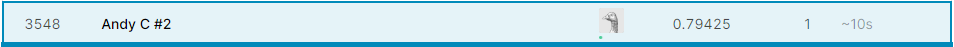

Shown above is the final leaderboard placing. The model only had an accuracy of 79.4% on the test set, which isn't far off what was predicted using cross validation.